## A Whale Off The Port(folio)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

### Whale Data

In [2]:
# Reading whale returns
whale_path = Path('~/Desktop/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Verify nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

------------------------------------------------------------------------------------------------------------------------

### Algorithmic Data

In [6]:
# Read algo csv
algo_path = Path('~/Desktop/algo_returns.csv') 
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
# Verify nulls dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

----------------------------------------------------------------------------


### S&P 500 Data

In [10]:
# Read sp500 data
sp500_path = Path('~/Desktop/sp500_hist.csv')
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check data types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Convert data type from object to float by removing the $ before price
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Save as float
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [14]:
# Calculate daily returns
sp500_df['Close'] = sp500_df['Close'].pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Check for nulls
sp500_df.isnull().sum()

Close    1
dtype: int64

In [16]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [17]:
# Change column name from Close to S&P 500
sp500_df.rename(columns={"Close": "S&P 500"},inplace=True)
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


### Combine Data

In [18]:
# Concatenate all DataFrames into single DataFrame
daily_returns = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


### Portfolio Analysis

Text(0.5, 1.0, 'Daily Returns')

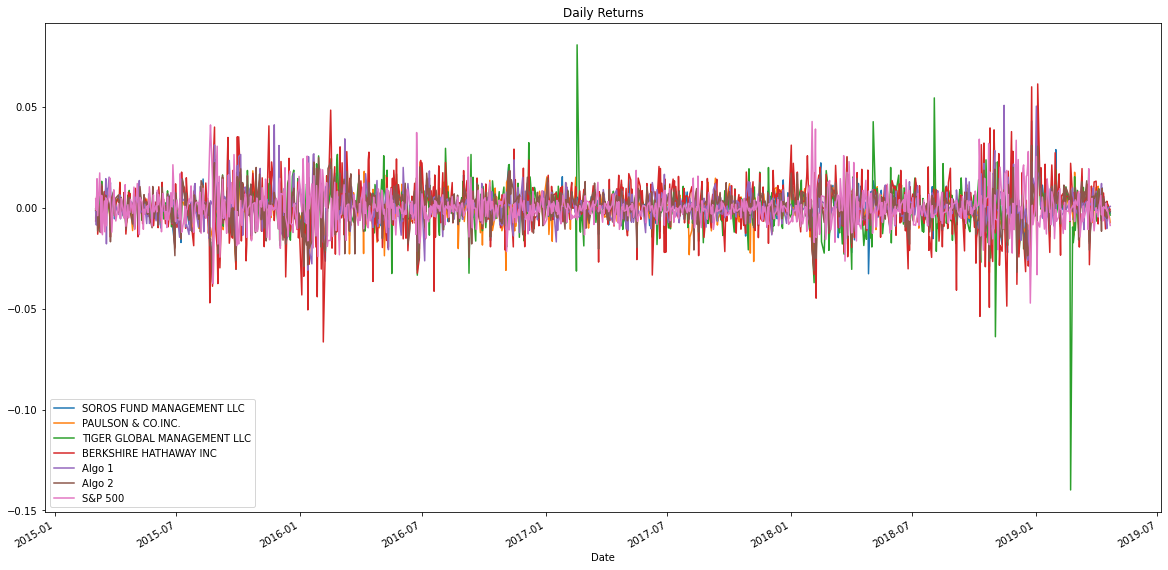

In [19]:
# Plot daily returns
ad = daily_returns.plot(figsize=(20,10))
ad.set_title('Daily Returns')

Text(0.5, 1.0, 'Cumulative Returns')

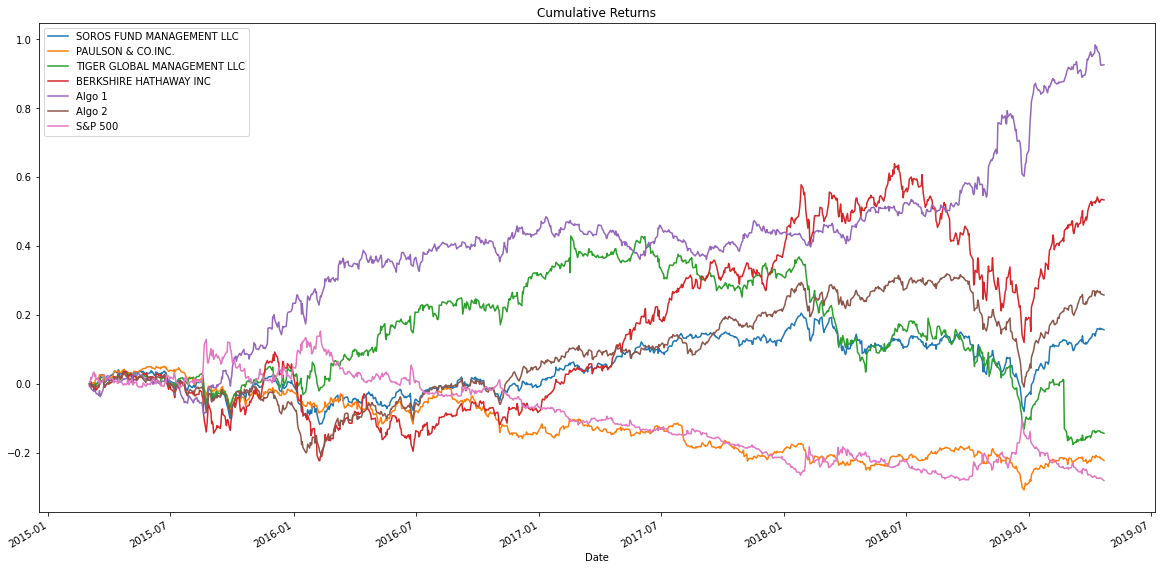

In [20]:
# Plot cumulative returns
cumulative_returns=(1+daily_returns).cumprod()-1
ac = cumulative_returns.plot(figsize=(20,10))
ac.set_title('Cumulative Returns')

### Risk

Text(0.5, 1.0, 'Portfolio Risk')

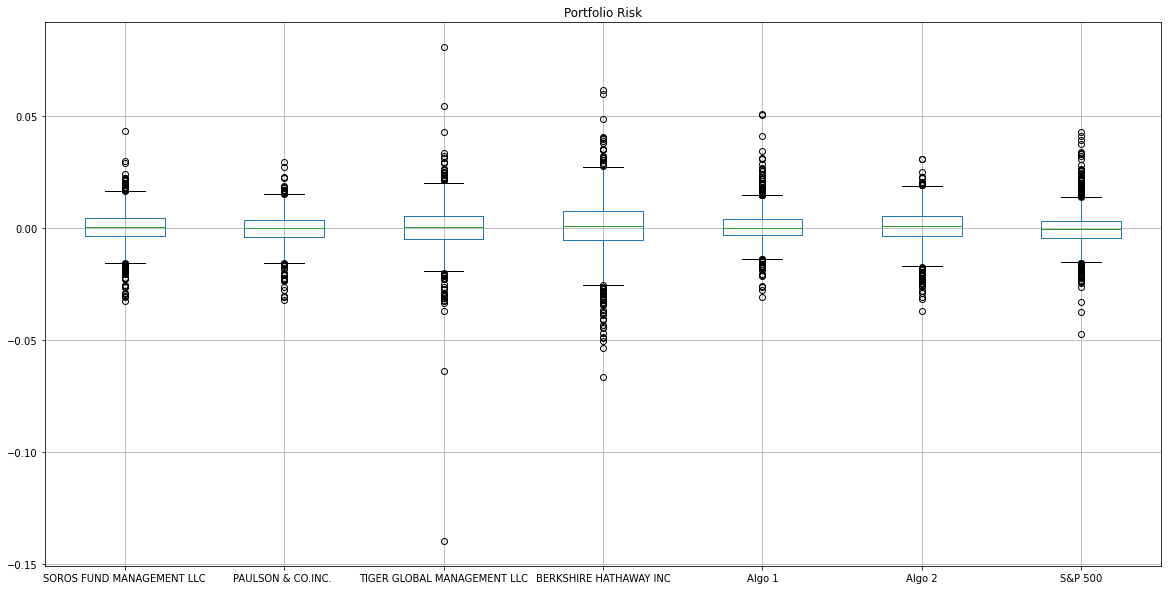

In [21]:
# Visually show risk using box plot
ab = daily_returns.boxplot(figsize=(20,10))
ab.set_title('Portfolio Risk')

In [22]:
# Calculate standard deviation for all portfolios
daily_std = daily_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
print(f"The following portfolios are riskier than the S&P 500:\n\n{riskier}")

The following portfolios are riskier than the S&P 500:

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [24]:
# Calculate annual standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

### Rolling Statistics

Text(0.5, 1.0, '21 Day Rolling Standard Deviation')

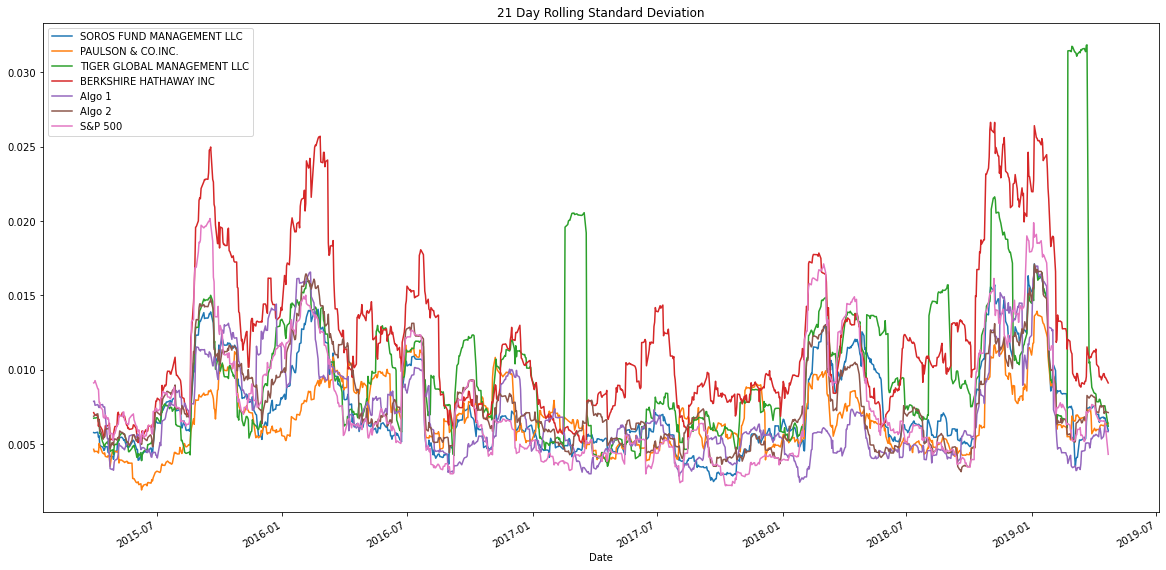

In [25]:
# Calculate and plot 21 day rolling standard deviation
aa = daily_returns.rolling(window=21).std().plot(figsize=(20,10))
aa.set_title('21 Day Rolling Standard Deviation')

In [26]:
# Correlation
correlation = daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


Text(0.5, 1.0, 'BRK-A Beta')

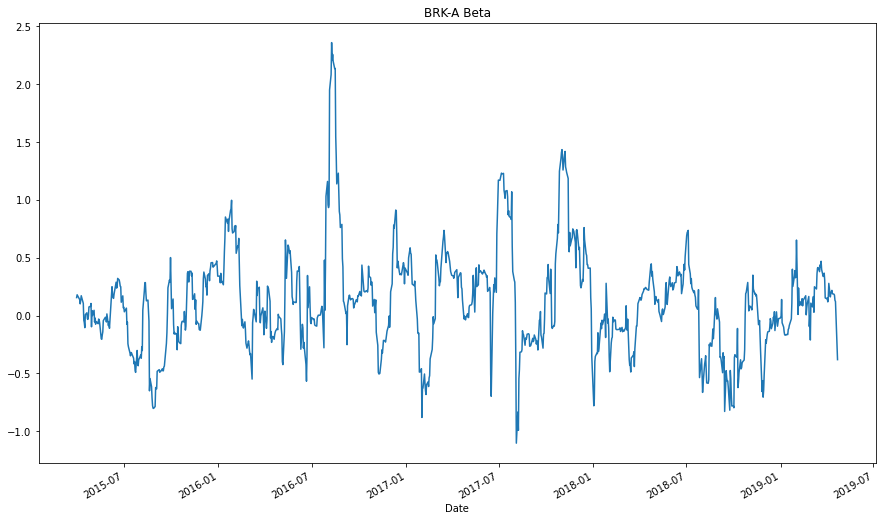

In [31]:
# Calculate beta for a single portfolio compared to the S&P 500

# Calculate covariance & rolling covariance
covariance = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['S&P 500'])
rolling_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(daily_returns['S&P 500'])

# Calculate variance & rolling variance
variance = daily_returns['S&P 500'].var()
rolling_variance = daily_returns['S&P 500'].rolling(window=21).var()

# Calculate beta 
berk_beta = rolling_covariance / rolling_variance

# Plot beta
ae = berk_beta.plot(figsize=(15,9))
ae.set_title('BRK-A Beta')

Text(0.5, 1.0, '21 Day Exponentially Weighted Average')

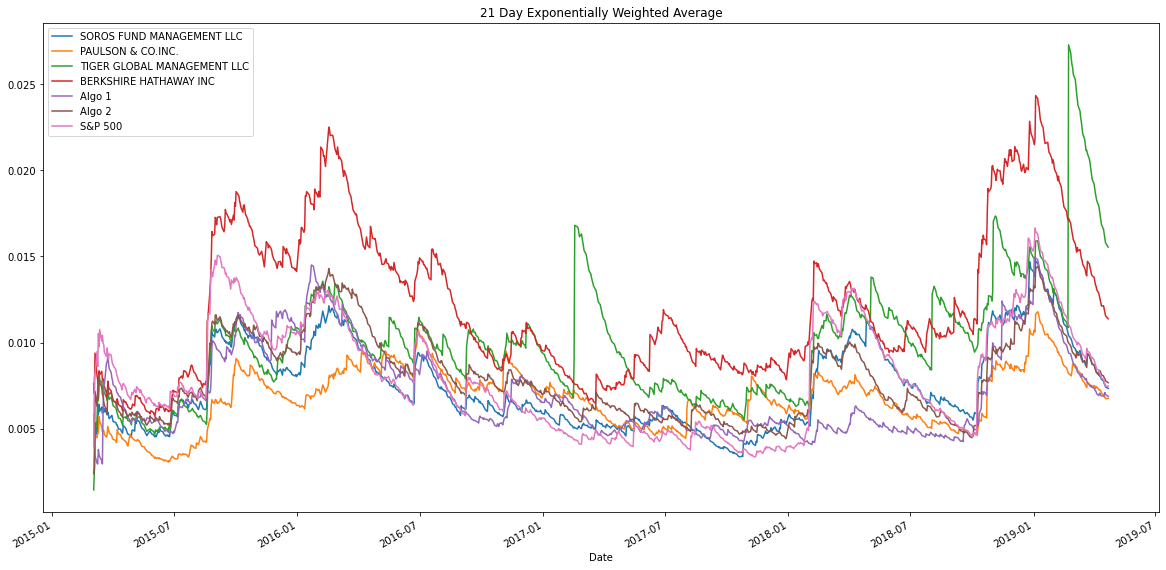

In [32]:
# Calculate 21 day rolling window using ema
ax = daily_returns.ewm(halflife=21).std().plot(figsize=(20,10))
ax.set_title('21 Day Exponentially Weighted Average')

### Sharpe Ratios

In [33]:
# Calculate sharpe ratios
sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratios')

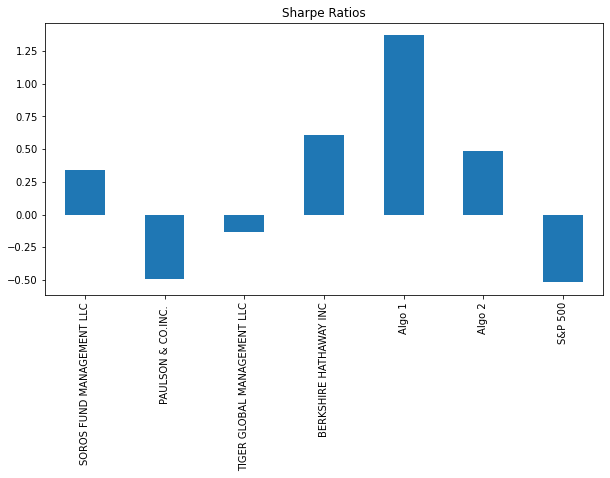

In [34]:
# Plot sharpe ratios using bar plot
af = sharpe_ratios.plot.bar(figsize=(10,5))
af.set_title('Sharpe Ratios')

### Custom Portfolio Returns

In [35]:
# Import custom stocks
import matplotlib.pyplot as plt
from pandas_datareader import data
import datetime
datetime.date.today().strftime('%Y-%m-%d' )

start_date = '2015-03-03'
end_date = datetime.date.today().strftime('%Y-%m-%d')
custom_portfolio = data.get_data_yahoo(['AAPL', 'TSLA', 'AMZN'], start_date, end_date)
custom_portfolio = custom_portfolio['Adj Close']
custom_portfolio.head()

Symbols,AAPL,TSLA,AMZN
Date,,,
2015-03-03,118.723381,199.559998,384.609985
2015-03-04,117.970802,202.440002,382.720001
2015-03-05,116.015945,200.630005,387.829987
2015-03-06,116.190331,193.880005,380.089996
2015-03-09,116.685921,190.880005,378.559998


In [36]:
# Check for nulls
custom_portfolio.isnull().sum()

Symbols
AAPL    0
TSLA    0
AMZN    0
dtype: int64

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
custom_returns = custom_portfolio.pct_change()[1:]
weighted_returns = (weights * custom_returns)
portfolio_returns = weighted_returns.sum(axis=1)
cumulative_returns = (portfolio_returns + 1).cumprod()
print(cumulative_returns.head())

Date
2015-03-04    1.001060
2015-03-05    0.997002
2015-03-06    0.979688
2015-03-09    0.974713
2015-03-10    0.959272
dtype: float64


In [38]:
# Concatenate custom portfolio to larger data frame and change column name
new_portfolio = pd.concat([whale_df, algo_df, sp500_df, cumulative_returns], axis="columns", join="inner")
new_portfolio.rename(columns={0 : 'Custom'}, inplace=True)
new_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,1.001060
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.997002
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.979688
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.974713
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,0.959272


In [39]:
# Verify nulls
new_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

In [40]:
# Analyze risk for new portfolio and compare to others
new_risk = new_portfolio.std()
print(new_risk.sort_values())

PAULSON & CO.INC.              0.007027
Algo 1                         0.007626
SOROS FUND MANAGEMENT LLC      0.007900
Algo 2                         0.008345
S&P 500                        0.008590
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
Custom                         0.528869
dtype: float64


Text(0.5, 1.0, '21 Day Rolling Standard Deviation')

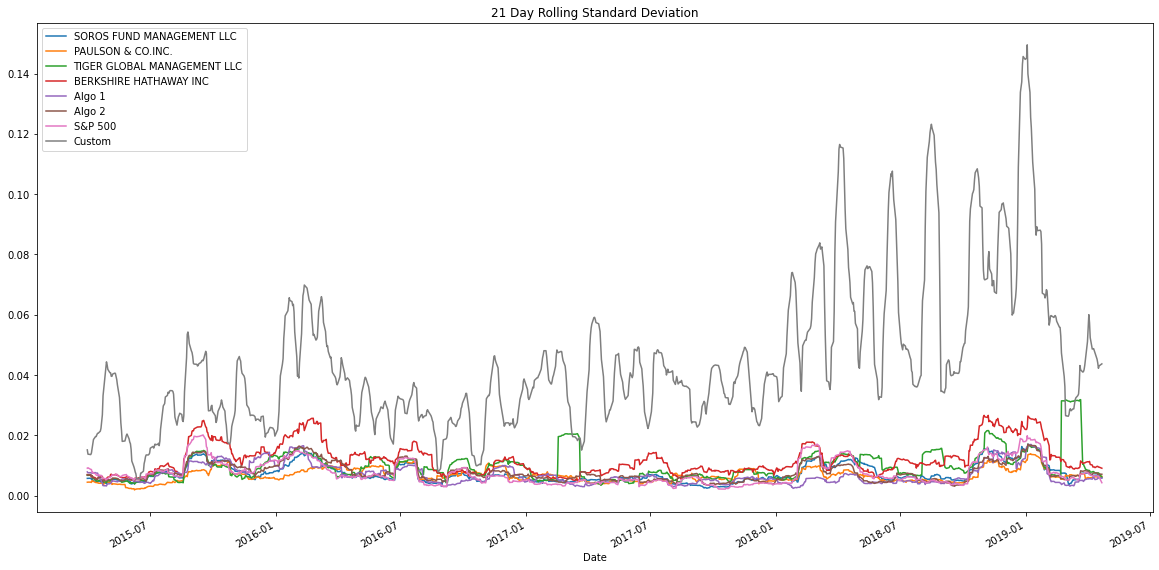

In [41]:
# Create 21 day rolling std chart with new portfolio
ag = new_portfolio.rolling(window=21).std().plot(figsize=(20,10))
ag.set_title('21 Day Rolling Standard Deviation')

In [42]:
# Annualized sharpe ratios
new_sharpe_ratios = (new_portfolio.mean()*252) / (new_portfolio.std()*np.sqrt(252))
new_sharpe_ratios.sort_values()

S&P 500                        -0.526730
PAULSON & CO.INC.              -0.480959
TIGER GLOBAL MANAGEMENT LLC    -0.129556
SOROS FUND MANAGEMENT LLC       0.345506
Algo 2                          0.486307
BERKSHIRE HATHAWAY INC          0.614872
Algo 1                          1.374206
Custom                         50.646432
dtype: float64

Text(0.5, 1.0, 'New Sharpe Ratios')

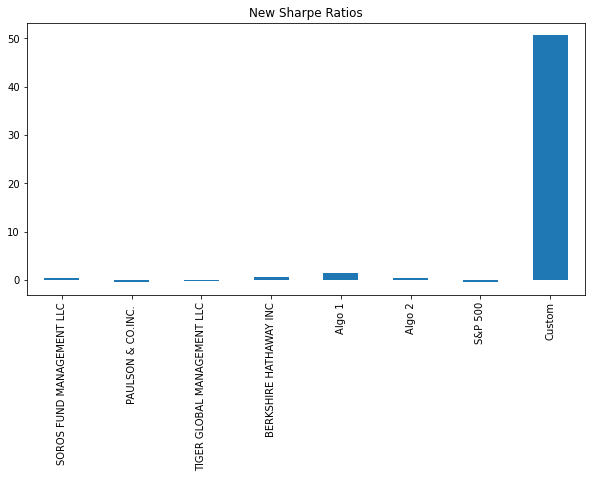

In [112]:
# Visualize sharpe ratios using bar plot
ah = new_sharpe_ratios.plot.bar(figsize=(10,5))
ah.set_title('New Sharpe Ratios')

In [43]:
# Correlation for new portfolio
new_corr = new_portfolio.corr()
new_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.000669,0.011623
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.013910,0.017778
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,-0.001485,-0.060837
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,-0.013573,0.021132
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,-0.033790,0.004034
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,-0.002116,0.007458
S&P 500,0.000669,0.013910,-0.001485,-0.013573,-0.033790,-0.002116,1.000000,0.013752
Custom,0.011623,0.017778,-0.060837,0.021132,0.004034,0.007458,0.013752,1.000000


Text(0.5, 1.0, 'Custom Portfolio Beta')

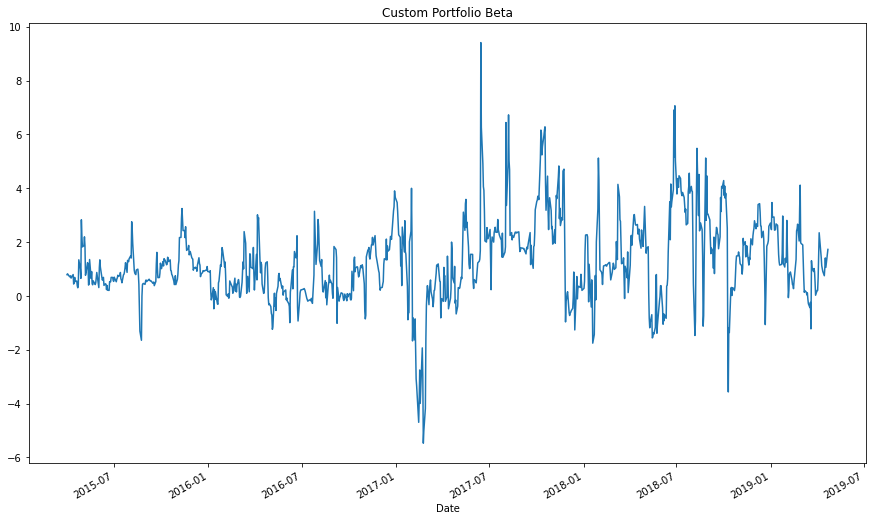

In [44]:
# Calculate beta for a single portfolio compared to the S&P 500 and plot it

# Calculate covariance & rolling covariance
cov = new_portfolio['Custom'].cov(new_portfolio['S&P 500'])
rolling_cov = new_portfolio['Custom'].rolling(window=21).cov(new_portfolio['S&P 500'])

# Calculate variance & rolling variance
var = new_portfolio['S&P 500'].var()
rolling_var = new_portfolio['S&P 500'].rolling(window=21).var()

# Calculate beta 
custom_beta = rolling_cov / rolling_var

# Plot custom beta
ai = custom_beta.plot(figsize=(15,9))
ai.set_title('Custom Portfolio Beta')